# 模块B：数据分析（30分）

# 竞赛题目：倒闭公司数据分析

## 任务启动

In [23]:
# 导入常规库

import pandas as pd
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 任务1：数据读取（1分）

In [24]:
# TODO:

data = pd.read_csv('../data/company.csv')

In [25]:
data.columns

Index(['公司名称', '关闭时间', '成立时间', '产品简介', '行业', '地点', '获投状态', '存活天数', 'logo',
       '行业标签', '关闭原因'],
      dtype='object')

### 任务2：数据处理（8分）

#### 任务2-1（1分）

查找`关闭原因`字段缺失值，具体要求如下：

- 将其索引查找出来
- 结果以变量`index`保存

In [26]:
# TODO:

index = data.loc[data['关闭原因'].isnull() == True].index.tolist()[0]
index

542

#### 任务2-2（1分）

增加`区域`字段，具体要求如下：

- 将`地点`字段里的数据对应到相应的区域。对应关系如下:
  - 华北地区: 北京, 天津, 河北, 山西, 内蒙古
  - 华东地区: 上海, 江苏, 浙江, 安徽, 福建, 江西, 山东
  - 东北地区: 辽宁, 吉林, 黑龙江
  - 中南地区: 湖北, 湖南, 河南, 广东, 广西, 海南
  - 西南地区: 四川, 重庆, 贵州, 云南, 西藏
  - 西北地区: 陕西, 甘肃, 新疆, 青海, 宁夏
  - 港澳台地区: 香港, 澳门, 台湾

In [27]:
# TODO:

# data['区域'] = data['地点'].replace(['北京', '天津', '河北', '山西', '内蒙古'], '华北地区')
# data['区域'].replace(['上海', '江苏', '浙江', '山东', '安徽'], '华东地区', inplace=True)
# data['区域'].replace(['辽宁', '吉林', '黑龙江'], '华北地区', inplace=True)
# data['区域'].replace(['湖北', '湖南', '河南', '江西'], '华中地区', inplace=True)
# data['区域'].replace(['广东', '广西', '海南', '福建'], '华南地区', inplace=True)
# data['区域'].replace(['四川', '重庆', '贵州', '云南', '西藏'], '西南地区', inplace=True)
# data['区域'].replace(['陕西', '甘肃', '新疆', '青海', '宁夏'], '西北地区', inplace=True)
# data['区域'].replace(['香港', '澳门', '台湾'], '港澳台地区', inplace=True)

In [28]:
# TODO:

def func2_2(city):
    if city in ['北京', '天津', '河北', '山西', '内蒙古']:
        return '华北地区'
    elif city in ['上海', '江苏', '浙江', '安徽', '福建', '江西', '山东']:
        return '华东地区'
    elif city in ['辽宁', '吉林', '黑龙江']:
        return '东北地区'
    elif city in ['湖北', '湖南', '河南', '广东', '广西', '海南']:
        return '中南地区'
    elif city in ['四川', '重庆', '贵州', '云南', '西藏']:
        return '西南地区'
    elif city in ['陕西', '甘肃', '新疆', '青海', '宁夏']:
        return '西北地区'
    else:
        return '港澳台地区'


data['区域'] = data['地点'].apply(func2_2)

#### 任务2-3（1分）

增加`关闭月份`字段，具体要求如下：

- 处理`关闭时间`字段，提取`年-月`信息。例如将`2021-02-19`处理为`2021-02`。

In [29]:
#TODO:
data['关闭时间'] = pd.to_datetime(data['关闭时间'])
data['关闭月份']= data['关闭时间'].apply(lambda x: datetime.datetime.strftime(x, "%Y-%m"))
data['关闭月份'].unique()

array(['2021-02', '2021-01', '2020-12', '2020-11', '2020-10', '2020-09',
       '2020-08', '2020-07', '2020-06', '2020-05', '2020-04', '2020-03',
       '2020-02', '2020-01'], dtype=object)

#### 任务2-4（1分）

增加`关闭季度`字段，具体要求如下：

- 处理`关闭时间`字段，提取季度信息。例如将`2021-02-19`处理为`1`。

In [30]:
# TODO:
    
data['关闭季度'] = data['关闭时间'].dt.quarter
data['关闭季度'].unique()

array([1, 4, 3, 2], dtype=int64)

#### 任务2-5（2分）

处理`关闭原因`字段，具体要求如下：

- 查找出倒闭原因之最。
- 结果以变量`reason_top1`保存。

In [31]:
# TODO:
from collections import Counter

reason_list = []

for item in data['关闭原因']:
    try:
        reason_list.extend(item.split('、'))
    except AttributeError:
        pass
    
reason = Counter(reason_list).most_common()
reason_top1 = reason[0][0]
reason_top1


'行业竞争'

#### 任务2-6（2分）

增加`存活年限`字段，具体要求如下：

- 划分存活年限，划分7个等级
  - 半年：0天 - 180天
  - 一年：181天 - 365天
  - 两年：366天 - 730天
  - 三年：731天 - 1095天
  - 四年：1096天 - 1460天
  - 五年：1461天 - 1825天
  - 五~十年：1826天 - 3650天
  - 十年以上：3651天 - …

In [32]:
# TODO:

def func2_6(days):
    if days <= 180:
        return '半年'
    elif days <= 365:
        return '一年'
    elif days <= 730:
        return '两年'
    elif days <= 1095:
        return '三年'
    elif days <= 1460:
        return '四年'
    elif days <= 1825:
        return '五年'
    elif days <= 3650:
        return '五~十年'
    else:
        return '十年以上'


data['存活年限'] = data['存活天数'].apply(func2_6)


### 任务3：数据可视化（21分）

#### 任务3-1（2分）

统计`行业标签`，以词云图展示。

- 图形类别正确（0.5分）
- 词云图形状为`tags`。（0.5分）
- 词云图词频正确。（1分）


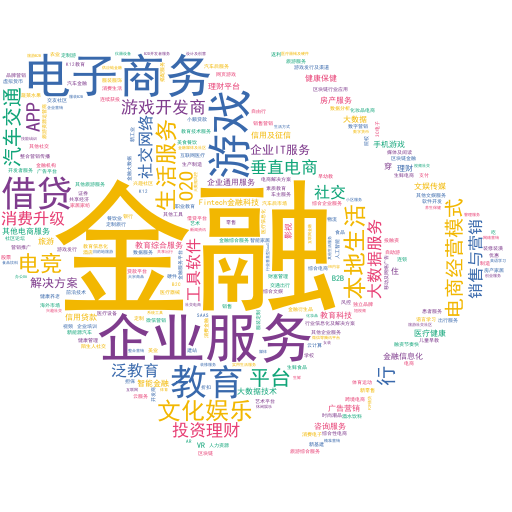

In [33]:
import stylecloud
from IPython.display import Image

tag_list = []

for item in data['行业标签']:
    try:
        tag_list.extend(item.split('、'))
    except AttributeError:
        pass

stylecloud.gen_stylecloud(text=' '.join(tag_list),
                          collocations=False,
                          icon_name='fas fa-tags',
                          font_path='../data/SimHei.ttf',
                          output_name='cloud.png')
Image('cloud.png')


#### 任务3-2（2分）

统计关闭行业，以条形图展示。

- 图形类别正确。（1分）
- 标题居中，x轴标签旋转`-30度`。（0.5分）
- 数值正确。（1分）


In [34]:
# TODO:

data_x = data['行业'].value_counts().index.tolist()
data_y = data['行业'].value_counts().values.tolist()

bar = (
    Bar()
    .add_xaxis(data_x)
    .add_yaxis('', data_y)
    .set_global_opts(title_opts=opts.TitleOpts(title="关闭行业统计", pos_left='center'),
                     xaxis_opts=opts.AxisOpts(
                         axislabel_opts=opts.LabelOpts(rotate=-30))
                     )
)

bar.render_notebook()

#### 任务3-3（2分）

制作倒闭公司季度分布图，以玫瑰图展示。

- 图形类别正确。（1分）
- 标签数值正确，格式正确。数值保留2位小数，示例：`一季度: 2.18%`（1分）


In [35]:
# TODO:

labels = ['一季度', '二季度', '三季度', '四季度', ]
value = data['关闭季度'].value_counts().sort_index().values.tolist()

c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(labels, value)],
        radius=["50%", "75%"],
        rosetype="area"
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="倒闭公司季度分布"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))

)
c.render_notebook()

#### 任务3-4（2分）

统计各行业平均存活天数，以象形图展示。

- 图形类别正确（1分）
- 数值正确（0.5分）
- 数值居右（0.5分）


In [36]:
# TODO:

from pyecharts.globals import SymbolType

m_data = data.groupby(['行业'])['存活天数'].mean().reset_index()
m_data.sort_values(by='存活天数', ascending=False, inplace=True)
data_x = m_data['行业'].tolist()[::-1]
data_y = m_data['存活天数'].tolist()[::-1]

c = (
    PictorialBar()
    .add_xaxis(data_x)
    .add_yaxis(
        '',
        [int(i) for i in data_y],
        label_opts=opts.LabelOpts(position='right'),
        symbol_size=18,
        symbol_repeat="fixed",
        is_symbol_clip=True,
        symbol=SymbolType.ROUND_RECT,
    )
    .reversal_axis()
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各行业平均存活天数"),
        xaxis_opts=opts.AxisOpts(is_show=False),
        yaxis_opts=opts.AxisOpts(
            axistick_opts=opts.AxisTickOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(is_show=False)
        )
    )
)
c.render_notebook()

#### 任务3-5（2分）

统计电商行业不同公司寿命的个数和倒闭率。寿命以条形图展示，倒闭率以折线图展示。倒闭率以叠加方式展示，从最低寿命开始叠加，一直叠加到1。

> 注：公司寿命直接以年为单位计算，如`2018-02-18`到`2019-01-01`，则统计为`1`年。

具体要求如下：

- 图形类别正确。（0.5分）
- 图形背景为黑色。（0.5分）
- 条形图数值正确，条形图颜色红绿渐变。（0.5分）
- 折线图走势正确，不显示数值。（0.5分）


In [37]:
data['成立时间'] = pd.to_datetime(data['成立时间'])
data['公司寿命'] = data['关闭时间'].dt.year - data['成立时间'].dt.year

shop = data[data['行业'] == '电子商务']
x_data = shop.groupby('公司寿命').公司寿命.count().index.tolist()
xaxis_data = [str(i) for i in x_data]
y_data = shop.groupby('公司寿命').公司寿命.count().values.tolist()
y_data2 = (shop.groupby('公司寿命').公司寿命.count().cumsum()/125).values.tolist()

bar = (
    Bar(init_opts=opts.InitOpts(theme='dark'))
    .add_xaxis(xaxis_data)
    .add_yaxis('不同寿命的公司个数', y_data,
               itemstyle_opts=opts.ItemStyleOpts(
                   color=JsCode("""new echarts.graphic.LinearGradient(0, 0, 0, 1, 
                    [{
                    offset: 0,
                    color: 'red'
                    }, {
                    offset: 1,
                    color: 'green'
                    }])""")
               )
               )
    .extend_axis(
        yaxis=opts.AxisOpts(name="倒闭率", interval=0.1)
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="电商行业"),
        yaxis_opts=opts.AxisOpts(
            name="不同寿命的公司个数", splitline_opts=opts.SplitLineOpts(is_show=True))
    )

)
line = (
    Line()
    .add_xaxis(xaxis_data)
    .add_yaxis(
        "倒闭率", y_data2,
        yaxis_index=1,
        label_opts=opts.LabelOpts(is_show=False),
        z=10
    )
)

bar.overlap(line).render_notebook()


#### 任务3-6（2分）

统计不同融资情况的比例，以环形图展示。

- 图形类别正确。（0.5分）
- 标签数值正确，数值保留2位小数。示例：`天使轮: 2.18%`（1分）
- 颜色渐变。（0.5分）


In [38]:
# TODO:

tz_x = data['获投状态'].value_counts().index.tolist()
tz_y = data['获投状态'].value_counts().values.tolist()

pie = (
    Pie()
    .add(
        '',
        [list(z) for z in zip(tz_x, tz_y)],
        radius=['35%', '55%']
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title='融资情况', pos_top='center', pos_right='center'),
        legend_opts=opts.LegendOpts(pos_right='right', pos_top='center'),
        visualmap_opts=opts.VisualMapOpts(
            is_show=False, min_=0, max_=200, range_color=['green', '#fafafa'])
    )
    .set_series_opts(label_opts=opts.LabelOpts(color='black', formatter='{b}：{d}%'))
)

pie.render_notebook()


#### 任务3-7（3分）
按月份递增统计不同行业的倒闭公司个数，以轮播条形图展示。

- 图形类别正确。（1分）
- 右下角显示当前轮播月份。（1分）
- 标签数值正确，格式正确。示例：金融: 112。（1分）

In [39]:
# TODO:

def watermarking(des):
    graphic_opts = [opts.GraphicGroup(
        graphic_item=opts.GraphicItem(
            bounding="raw",
            right=200,
            bottom=150,
            z=100),
        children=[
            opts.GraphicText(
                graphic_item=opts.GraphicItem(
                    left="center", top="center", z=100
                ),
                graphic_textstyle_opts=opts.GraphicTextStyleOpts(
                    text=des,
                    font="bold 60px Microsoft YaHei",
                ),
            ),
        ],
    )
    ]
    return graphic_opts


data_temp = data.groupby(['关闭月份', '行业'])['公司名称'].count().reset_index()
timeline = Timeline(init_opts=opts.InitOpts(theme='light', height='700px'))
timeline.add_schema(is_auto_play=True, is_loop_play=True)

month_array = []
for m in data_temp['关闭月份'].unique():
    month_array.append(m)
    m_data = data_temp[data_temp['关闭月份'].isin(month_array)]
    m_data = m_data.groupby(['行业'])['公司名称'].sum().reset_index()
    m_data.sort_values(by='公司名称', inplace=True)
    data_x = m_data['行业'].tolist()
    data_y = m_data['公司名称'].tolist()

    bar = (Bar()
           .add_xaxis(data_x)
           .add_yaxis('', data_y)
           .set_series_opts(label_opts=opts.LabelOpts(position="insideLeft", formatter='{b}:{c}'))
           .set_global_opts(xaxis_opts=opts.AxisOpts(is_show=False, max_=160),
                            yaxis_opts=opts.AxisOpts(is_show=False),
                            title_opts=opts.TitleOpts(
                                title="TOP 行业", pos_left='center'),
                            graphic_opts=watermarking(m),
                            visualmap_opts=opts.VisualMapOpts(is_show=False,
                                                              max_=50,
                                                              is_piecewise=False,
                                                              dimension=0,
                                                              range_color=['rgba(219,112,147,0.4)', 'rgba(238,25,27,1)']))
           .reversal_axis()
           )
    timeline.add(bar, m)

timeline.render_notebook()


#### 任务3-8（3分）
国内倒闭公司区域分布，以旭日图展示。

- 图形类别正确。（2分）
- 标签数值正确，格式正确。示例：北京: 112，华北地区: 445。（1分）


In [1]:
from pyecharts.charts import Sunburst
from pyecharts import options as opts

data = [
    {
        "name": "华北地区",
        "children": [
            {"name": "北京", "value": 4},
            {"name": "山西", "value": 3},
        ],
    },
    {
        "name": "东北地区",
        "children": [
            {"name": "黑龙江"},
            {"name": "吉林", "value": 3},
            {"name": "辽宁", "value": 2}
        ]
    },
    {
        "name": "中南地区",
        "children": [
            {"name": "武汉", "value": 3},
            {"name": "湖南", "value": 5},
        ],
    },
    {
        "name": "西北地区",
        "children": [
            {"name": "陕西", "value": 1},
            {"name": "甘肃", "value": 1},
            {"name": "青海", "value": 2}
        ],
    }
]

c = (
    Sunburst(init_opts=opts.InitOpts(
        theme='dark', width="500px", height="500px"))
    .add(
        "",
        data_pair=data,
        highlight_policy="ancestor",
        radius=[0, "95%"],
        levels=[
            {},
            {"r0": "15%", "r": "35%"},
            {"r0": "40%", "r": "75%"}
        ],
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="倒闭公司区域分布", pos_left='center'))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
)
c.render_notebook()


#### 任务3-9（3分）
国内倒闭公司地域分布地图，以3d地图和条形图展示。

- 图形类别正确。（2分）
- 注：3d地图各城市的坐标已提前给出。
- 标签数值正确，格式正确。示例：北京: 112。（1分）

In [41]:
from pyecharts.globals import ChartType

cood = [
    ("黑龙江", [127.9688, 45.368, 100]),
    ("内蒙古", [110.3467, 41.4899, 300]),
    ("吉林", [125.8154, 44.2584, 300]),
    ("辽宁", [123.1238, 42.1216, 300]),
    ("河北", [114.4995, 38.1006, 300]),
    ("天津", [117.4219, 39.4189, 300]),
    ("山西", [112.3352, 37.9413, 300]),
    ("陕西", [109.1162, 34.2004, 300]),
    ("甘肃", [103.5901, 36.3043, 300]),
    ("宁夏", [106.3586, 38.1775, 300]),
    ("青海", [101.4038, 36.8207, 300]),
    ("新疆", [87.9236, 43.5883, 300]),
    ("西藏", [91.11, 29.97, 300]),
    ("四川", [103.9526, 30.7617, 300]),
    ("重庆", [108.384366, 30.439702, 300]),
    ("山东", [117.1582, 36.8701, 300]),
    ("河南", [113.4668, 34.6234, 300]),
    ("江苏", [118.8062, 31.9208, 300]),
    ("安徽", [117.29, 32.0581, 300]),
    ("湖北", [114.3896, 30.6628, 300]),
    ("浙江", [119.5313, 29.8773, 300]),
    ("福建", [119.4543, 25.9222, 300]),
    ("江西", [116.0046, 28.6633, 300]),
    ("湖南", [113.0823, 28.2568, 300]),
    ("贵州", [106.6992, 26.7682, 300]),
    ("广西", [108.479, 23.1152, 300]),
    ("海南", [110.3893, 19.8516, 300]),
    ("上海", [121.4648, 31.2891, 1300]),
]

c = (
    Map3D(init_opts=opts.InitOpts(theme='dark'))
    .add_schema(
        itemstyle_opts=opts.ItemStyleOpts(
            color="rgb(5,101,123)",
            border_width=0.8,
            border_color="rgb(62,215,213)",
        )
    )
    .add(
        '',
        data_pair=cood,  # 坐标
        type_=ChartType.BAR3D,
        bar_size=1,
        label_opts=opts.LabelOpts(
            is_show=False,
            formatter=JsCode(
                "function(data){return data.name + '：' + data.value[2];}"),
        ),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="3D地图"))
)

c.render_notebook()
